In [11]:
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [4]:
model = tf.keras.models.load_model('saved_model')
# print(model.evaluate(x,y))

2023-02-23 18:48:02.379795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-23 18:48:02.379931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/birajad/.pyenv/versions/3.7.6/lib/python3.7/site-packages/cv2/../../lib64:
2023-02-23 18:48:02.379987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/birajad/.pyenv/versions/3.7.6/lib/python3.7/site-packages/cv2/../../lib64:
2023-02-23 18:48:02.380030: W tensorflow/compiler/xla/stream_executor/platform/def

In [38]:
def recognize_image(image, theModel=model):
    img = cv2.imread(image)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (30,30))
    ans = model
    # ans.summary()
    arr = ans.predict([np.array(img).reshape(1,30,30,3)])
    # print([float(i) for i in arr[0]]
    return ans.predict([np.array(img).reshape(1,30,30,3)]).argmax()

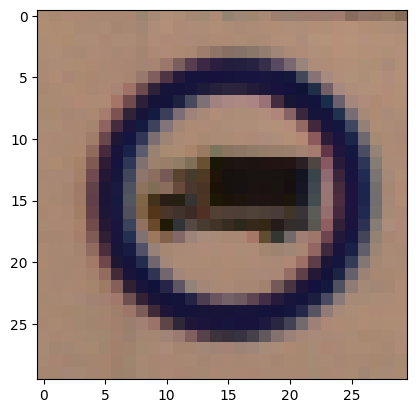

In [41]:
image = cv2.imread('test/00000.png')
img_array = tf.image.convert_image_dtype(image, tf.float32)
img_array = tf.image.resize(img_array, (30,30))

plt.imshow(img_array)

In [42]:
test_csv = pd.read_csv('test.csv')
test_df = pd.DataFrame(test_csv)
test_df['Path'] = test_df['Path'].apply(lambda x: x.lower())
print(test_df.head())

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  test/00000.png
1     42      45       5       5      36      40        1  test/00001.png
2     48      52       6       6      43      47       38  test/00002.png
3     27      29       5       5      22      24       33  test/00003.png
4     60      57       5       5      55      52       11  test/00004.png


In [45]:
total = 1000
right = 0
for idx, row in test_df.sample(1000).iterrows():
    actual = row['ClassId']
    predicted = recognize_image(row['Path'])
    if(actual == predicted):
        right += 1
    else:
        print('predicted', predicted, ' Actual: ', actual)

1/1 [==============================] - 0s 24ms/step
predicted 29  Actual:  30
1/1 [==============================] - 0s 20ms/step
predicted 32  Actual:  12
1/1 [==============================] - 0s 17ms/step
predicted 29  Actual:  30
1/1 [==============================] - 0s 17ms/step
predicted 40  Actual:  21
1/1 [==============================] - 0s 17ms/step
predicted 2  Actual:  4
1/1 [==============================] - 0s 21ms/step
predicted 2  Actual:  24
1/1 [==============================] - 0s 17ms/step
predicted 38  Actual:  36
1/1 [==============================] - 0s 17ms/step
predicted 11  Actual:  27
1/1 [==============================] - 0s 18ms/step
predicted 5  Actual:  3
1/1 [==============================] - 0s 21ms/step
predicted 29  Actual:  26
1/1 [==============================] - 0s 18ms/step
predicted 15  Actual:  25
1/1 [==============================] - 0s 15ms/step
predicted 11  Actual:  27
1/1 [==============================] - 0s 19ms/step
predicted 8  Actu

In [46]:
print('Total: ', total, 'Right: ', right, 'Wrong: ', total-right)

Total:  1000 Right:  950 Wrong:  50
